In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings("ignore")

In [2]:
rock_df1 = pd.read_excel('aggregateRockData-1.xlsx', header=None)
rock_df2 = pd.read_csv('norm540.txt', sep='\t', header=None)

In [3]:
rock_df = pd.concat([rock_df2.iloc[:, 3:22], rock_df1[[1]]], axis=1)

In [4]:
column_names = ['Porphyritic texture',
'Presence of holes',
'Salient green hue',
'Pegmatitic texture',
'Conchoidal fracture',
'Angular fragments',
'Rounded fragments',
'Straight stripes',
'Curved stripes',
'Physical layers',
'Veins',
'Oily/shimmery texture',
'Splotchy texture',
'Single translucent crystal',
'Multiple cubic crystals',
'Sandy texture',
'Fragments (disjunctive)',
'Stripes (disjunctive)',
'Crystals (disjunctive)']
rock_df.columns = column_names + ['Category']

In [5]:
rock_df

,Porphyritic texture,Presence of holes,Salient green hue,Pegmatitic texture,Conchoidal fracture,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture,Fragments (disjunctive),Stripes (disjunctive),Crystals (disjunctive),Category
0,1.690468,-0.159688,-0.646115,-0.252007,-0.609794,0.579927,0.375313,-0.352386,-0.260224,-0.759128,-0.013842,-0.540653,0.946521,-0.227922,-0.225045,-0.116312,0.635812,-0.409247,-0.310419,1
1,1.690468,-0.159688,-0.530724,0.127922,-0.482150,2.865772,0.375313,-0.352386,-0.260224,-0.529150,-0.512160,-0.540653,-0.249084,-0.227922,0.185510,-0.401124,2.042938,-0.409247,-0.034059,1
2,1.665576,-0.407623,0.858984,-0.631936,-0.443857,2.611790,-0.405184,-0.352386,-0.260224,-0.529150,-0.512160,-0.540653,1.245422,-0.227922,-0.225045,-0.401124,1.665865,-0.409247,-0.310419,1
3,2.233118,-0.407623,-0.415333,-0.424702,-1.120369,0.071962,4.017633,-0.352386,-0.260224,-0.529150,-0.512160,-0.540653,-0.249084,-0.227922,-0.225045,-0.116312,2.640737,-0.409247,-0.310419,1
4,2.213204,-0.159688,1.129901,-0.044773,-1.082076,1.341876,3.757467,-0.352386,-0.260224,-0.759128,-0.512160,-0.540653,-0.249084,-0.227922,-0.225045,-0.401124,2.659131,-0.409247,-0.310419,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,-0.037053,-0.159688,-0.435401,-0.410886,-1.126751,-0.436004,-0.405184,-0.352386,-0.260224,-0.759128,-0.512160,-0.540653,-0.547986,-0.227922,7.986072,-0.685937,-0.541391,-0.409247,5.216791,3
536,-0.584681,-0.407623,-0.957168,-0.493780,0.066717,-0.436004,-0.405184,4.102756,0.045922,-0.069195,-0.013842,-0.540653,-0.846887,-0.227922,-0.225045,1.592561,-0.541391,3.054169,-0.310419,3
537,-0.559789,0.881638,0.066299,-1.053311,-1.088458,-0.436004,-0.405184,-0.352386,-0.260224,-0.759128,-0.512160,-0.540653,-0.846887,-0.227922,-0.225045,5.010309,-0.541391,-0.409247,-0.310419,3
538,-0.753949,-0.407623,-0.029024,-0.701014,0.366680,-0.436004,-0.405184,-0.352386,-0.260224,1.770626,0.484475,-0.353270,-0.547986,-0.227922,-0.225045,-0.685937,-0.541391,-0.409247,-0.310419,3


# 1:

In [6]:
# summary statistics
rock_df.describe()

,Porphyritic texture,Presence of holes,Salient green hue,Pegmatitic texture,Conchoidal fracture,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture,Fragments (disjunctive),Stripes (disjunctive),Crystals (disjunctive),Category
count,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,540.000000
mean,-1.851852e-09,9.629630e-08,5.370370e-08,-6.296296e-08,-4.074074e-08,-1.537037e-07,-1.666667e-08,-1.814815e-07,-1.481481e-08,-1.166667e-07,-1.629630e-07,1.703704e-07,-6.851852e-08,-5.555556e-09,3.388889e-07,1.203704e-07,-1.148148e-07,-1.759259e-07,3.018519e-07,2.000000
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.999999e-01,1.000000e+00,1.000000e+00,9.999999e-01,1.000000e+00,1.000000e+00,1.000000e+00,9.999999e-01,0.817254
min,-1.321491e+00,-4.076230e-01,-1.187950e+00,-1.322715e+00,-1.248012e+00,-4.360040e-01,-4.051840e-01,-3.523860e-01,-2.602240e-01,-7.591280e-01,-5.121600e-01,-5.406530e-01,-8.468870e-01,-2.279220e-01,-2.250450e-01,-6.859370e-01,-5.413910e-01,-4.092470e-01,-3.104190e-01,1.000000
25%,-8.236470e-01,-4.076230e-01,-7.615050e-01,-8.046310e-01,-6.991450e-01,-4.360040e-01,-4.051840e-01,-3.523860e-01,-2.602240e-01,-7.591280e-01,-5.121600e-01,-5.406530e-01,-8.468870e-01,-2.279220e-01,-2.250450e-01,-6.859370e-01,-5.413910e-01,-4.092470e-01,-3.104190e-01,1.000000
50%,-3.009100e-01,-4.076230e-01,-3.751970e-01,-1.829290e-01,-2.715380e-01,-4.360040e-01,-4.051840e-01,-3.523860e-01,-2.602240e-01,-2.991730e-01,-5.121600e-01,-5.406530e-01,-2.490840e-01,-2.279220e-01,-2.250450e-01,-4.011240e-01,-5.413910e-01,-4.092470e-01,-3.104190e-01,2.000000
75%,7.644770e-01,-1.596880e-01,5.843033e-01,5.769290e-01,3.571070e-01,-1.820210e-01,-1.450180e-01,-3.523860e-01,-2.602240e-01,3.907600e-01,-1.384200e-02,-1.658870e-01,3.487180e-01,-2.279220e-01,-2.250450e-01,1.685000e-01,1.042300e-02,-2.072980e-01,-3.104190e-01,3.000000
max,2.422299e+00,4.551072e+00,2.750390e+00,4.175892e+00,3.813059e+00,4.643652e+00,4.798130e+00,4.888957e+00,5.862693e+00,3.610446e+00,8.457556e+00,3.207009e+00,4.832237e+00,7.120010e+00,7.986072e+00,5.010309e+00,3.137369e+00,3.629722e+00,5.216791e+00,3.000000


In [7]:
rock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Porphyritic texture         540 non-null    float64
 1   Presence of holes           540 non-null    float64
 2   Salient green hue           540 non-null    float64
 3   Pegmatitic texture          540 non-null    float64
 4   Conchoidal fracture         540 non-null    float64
 5   Angular fragments           540 non-null    float64
 6   Rounded fragments           540 non-null    float64
 7   Straight stripes            540 non-null    float64
 8   Curved stripes              540 non-null    float64
 9   Physical layers             540 non-null    float64
 10  Veins                       540 non-null    float64
 11  Oily/shimmery texture       540 non-null    float64
 12  Splotchy texture            540 non-null    float64
 13  Single translucent crystal  540 non

In [8]:
rock_df.isnull().sum()

Porphyritic texture           0
Presence of holes             0
Salient green hue             0
Pegmatitic texture            0
Conchoidal fracture           0
Angular fragments             0
Rounded fragments             0
Straight stripes              0
Curved stripes                0
Physical layers               0
Veins                         0
Oily/shimmery texture         0
Splotchy texture              0
Single translucent crystal    0
Multiple cubic crystals       0
Sandy texture                 0
Fragments (disjunctive)       0
Stripes (disjunctive)         0
Crystals (disjunctive)        0
Category                      0
dtype: int64

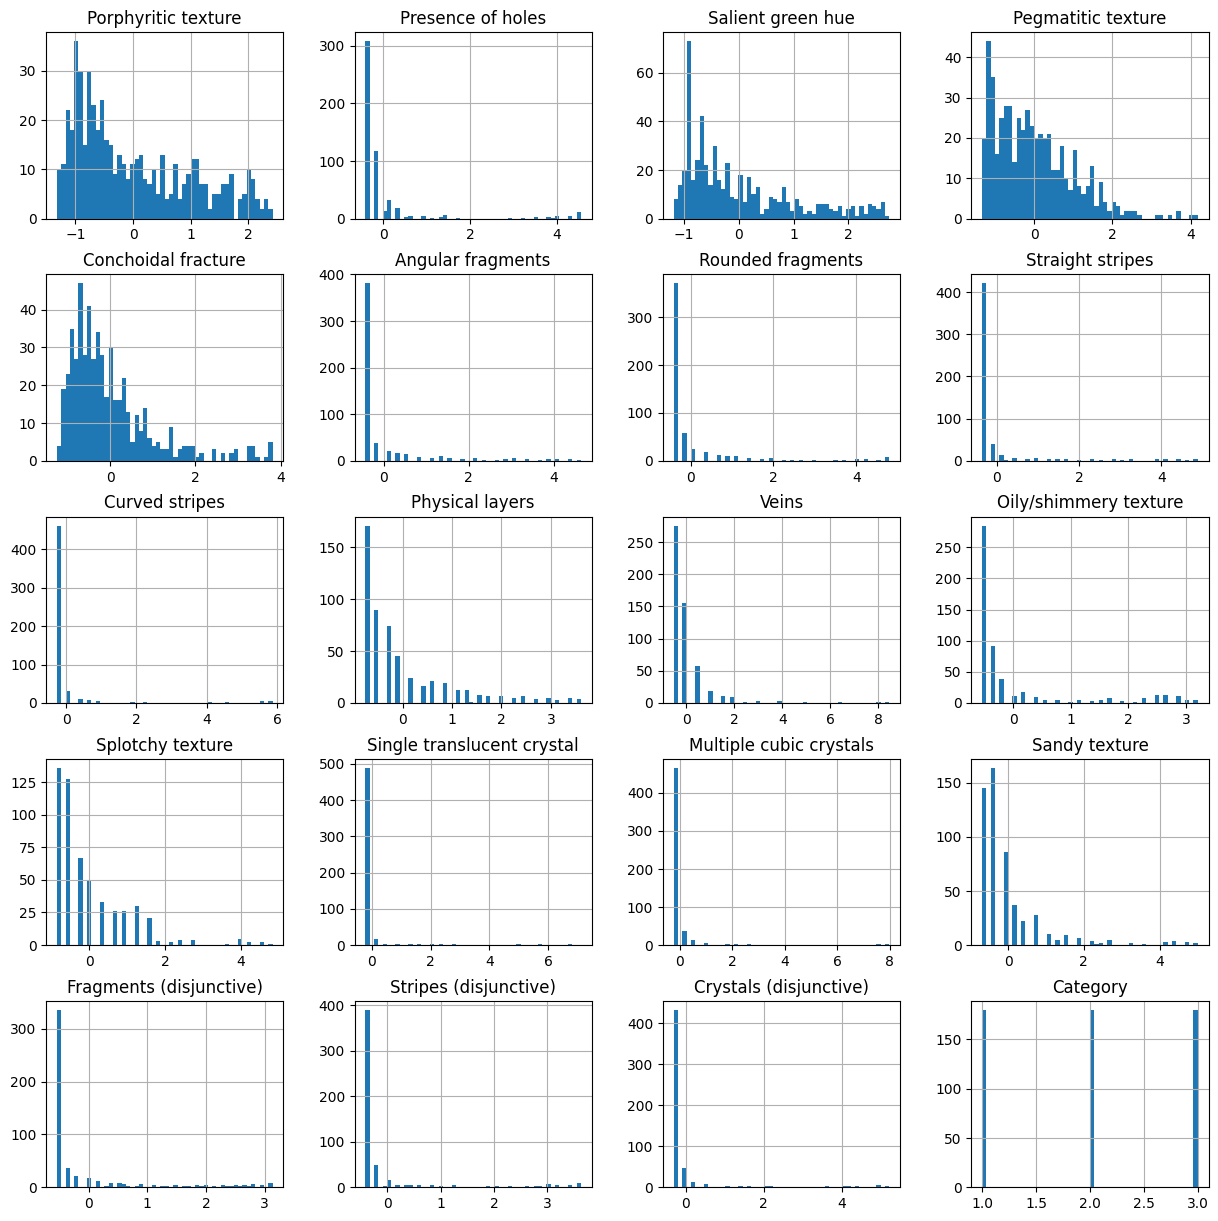

In [9]:
# histograms
rock_df.hist(bins=50, figsize=(15, 15))
plt.show()

<Figure size 2000x1000 with 0 Axes>

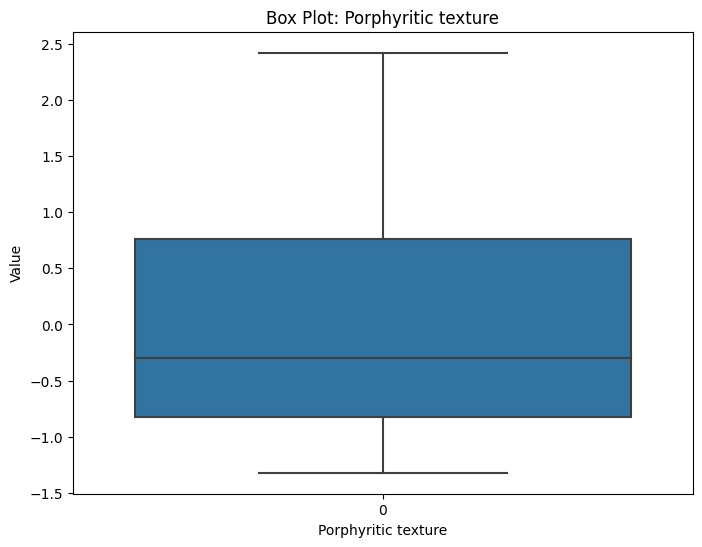

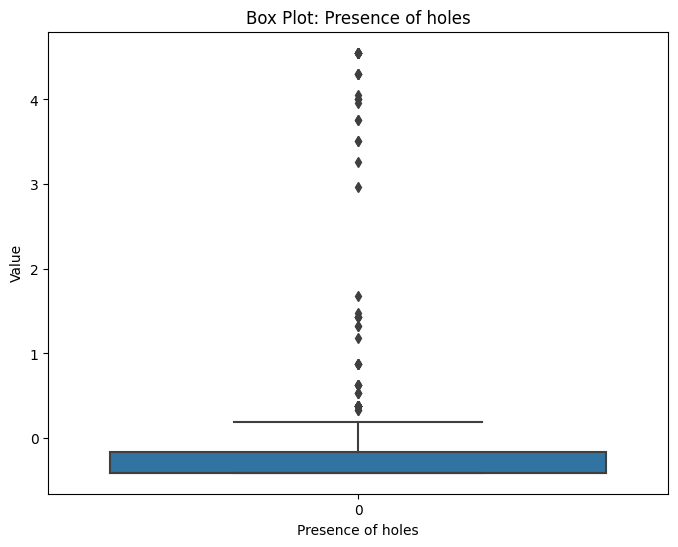

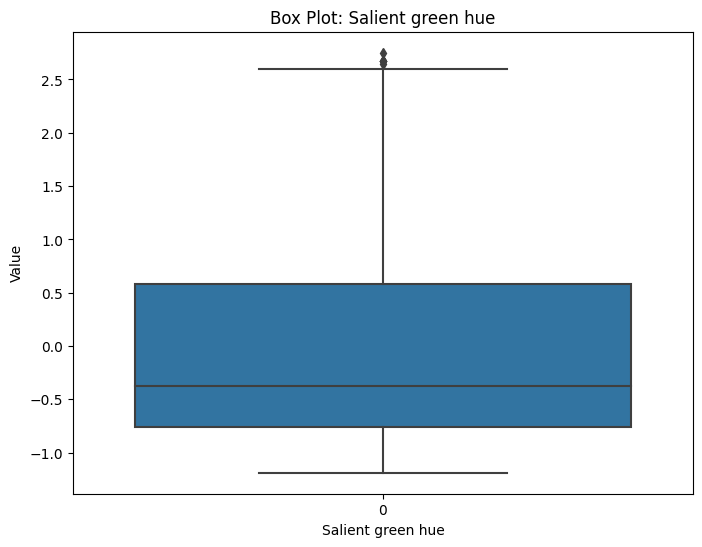

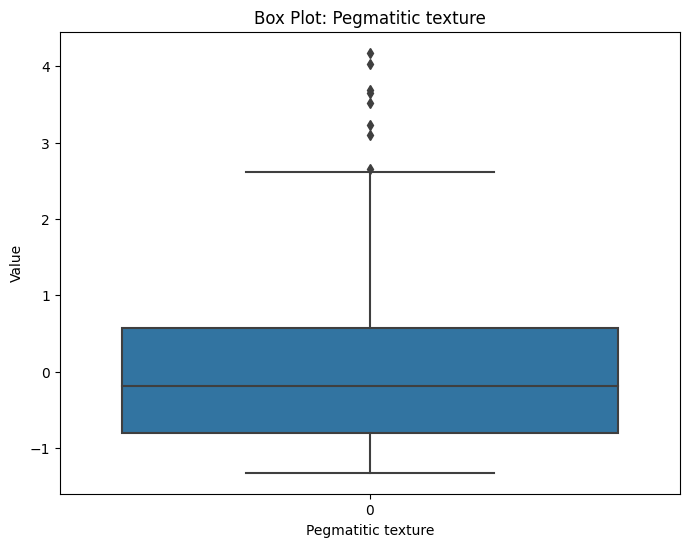

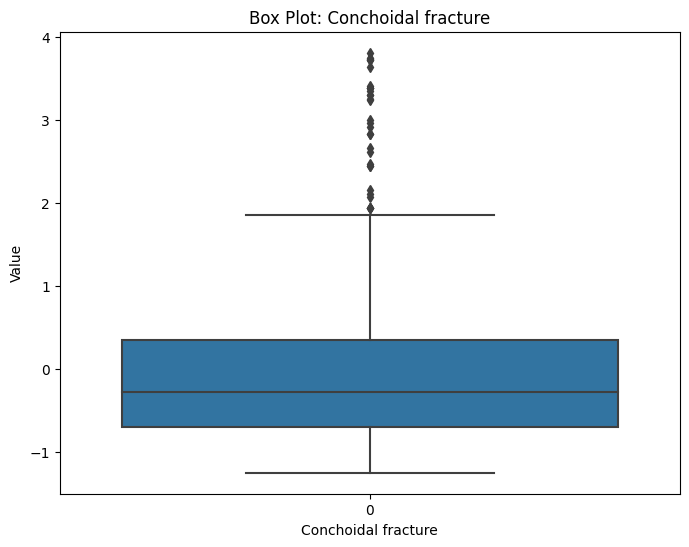

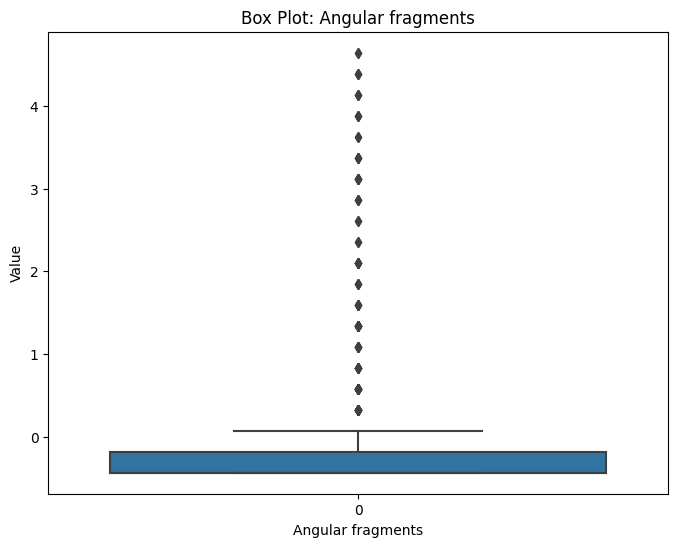

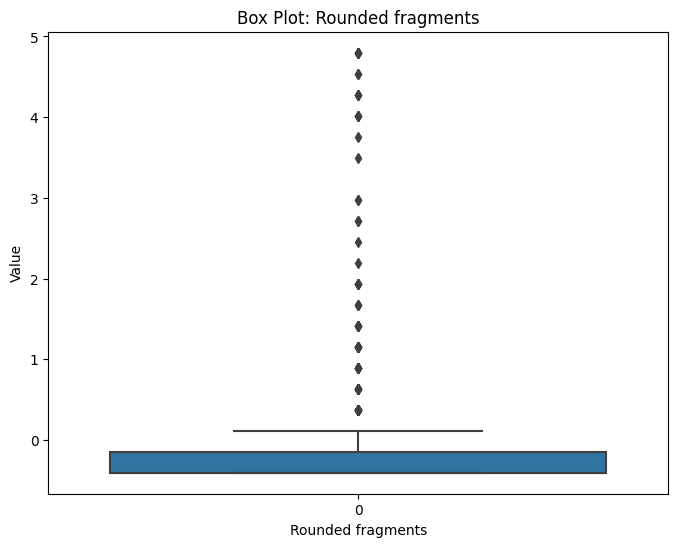

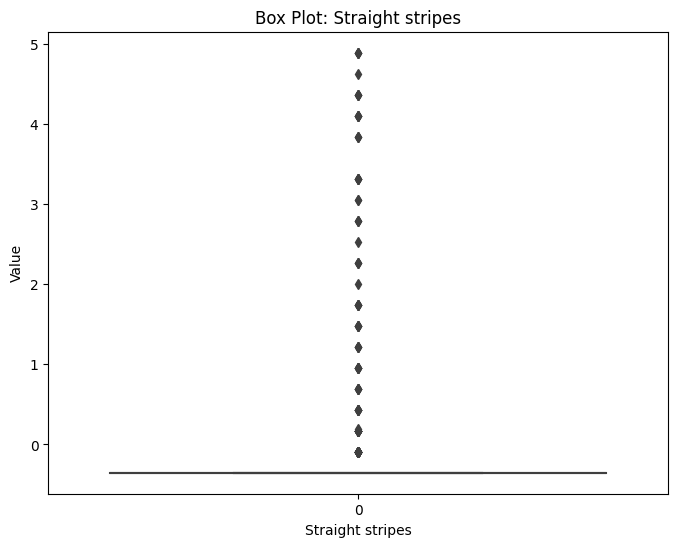

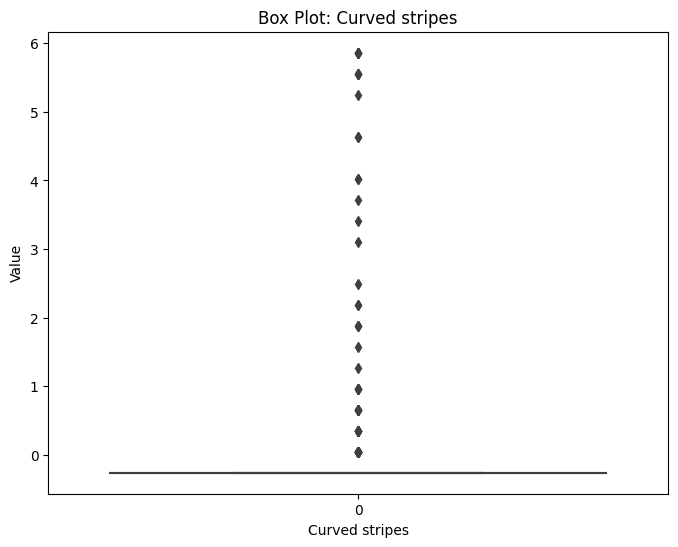

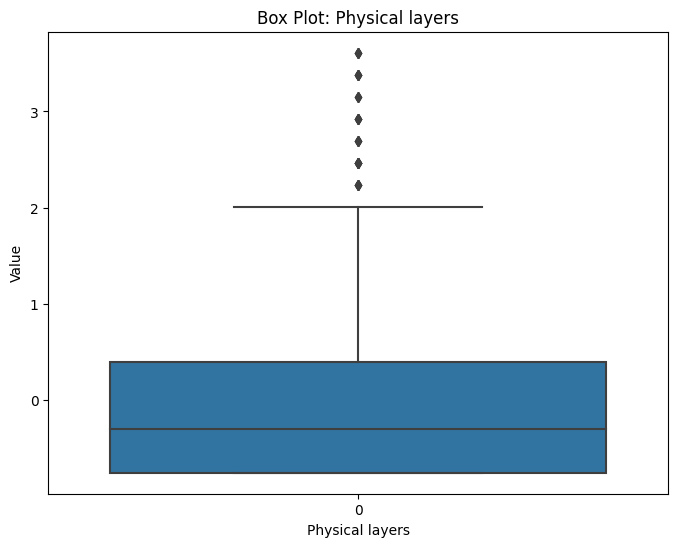

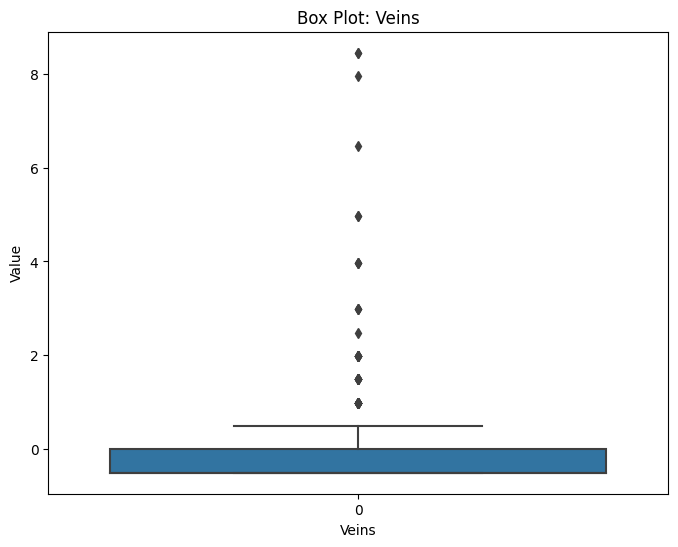

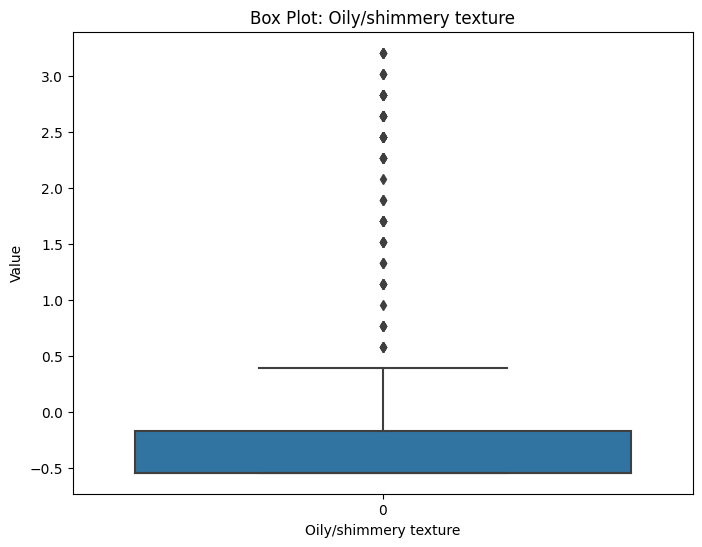

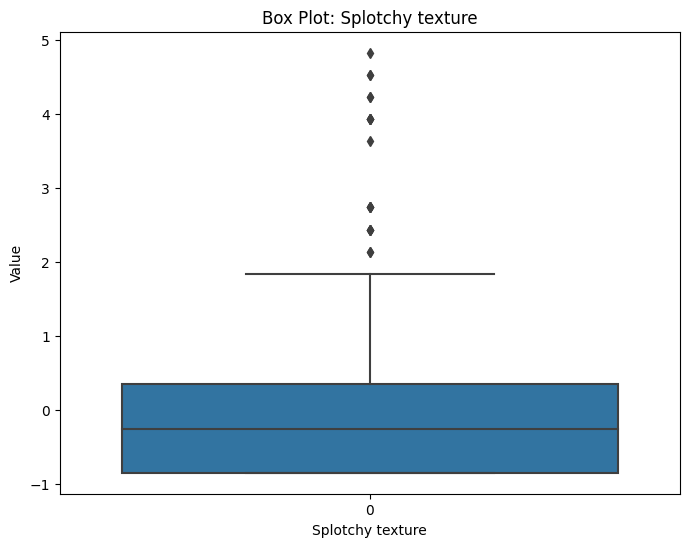

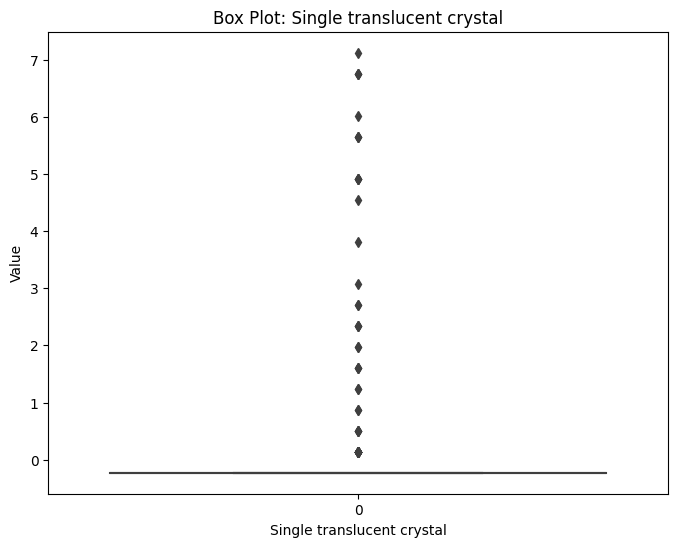

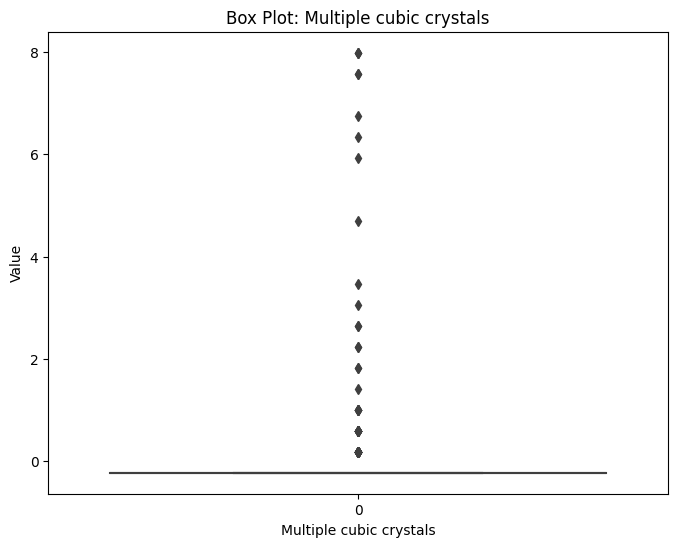

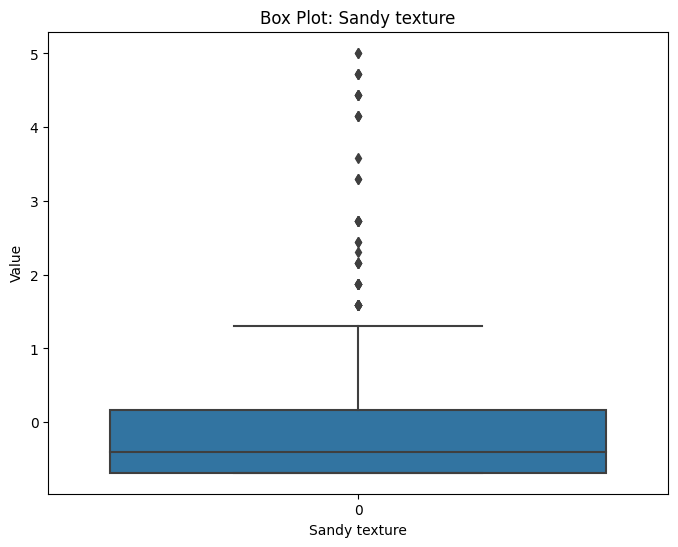

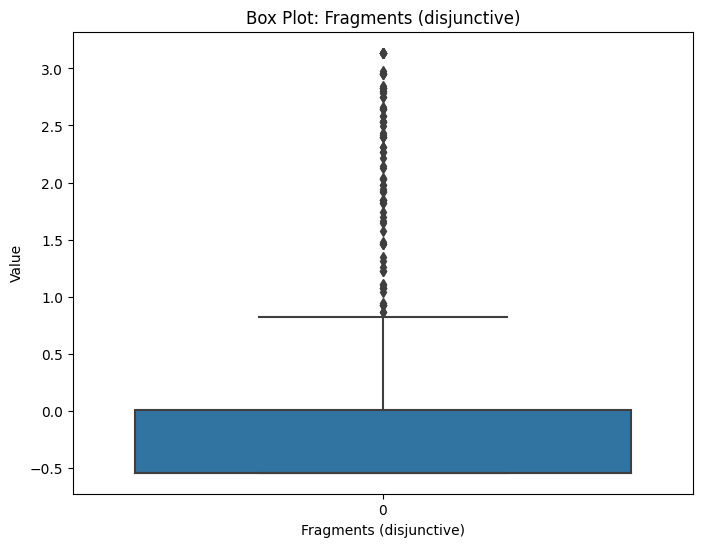

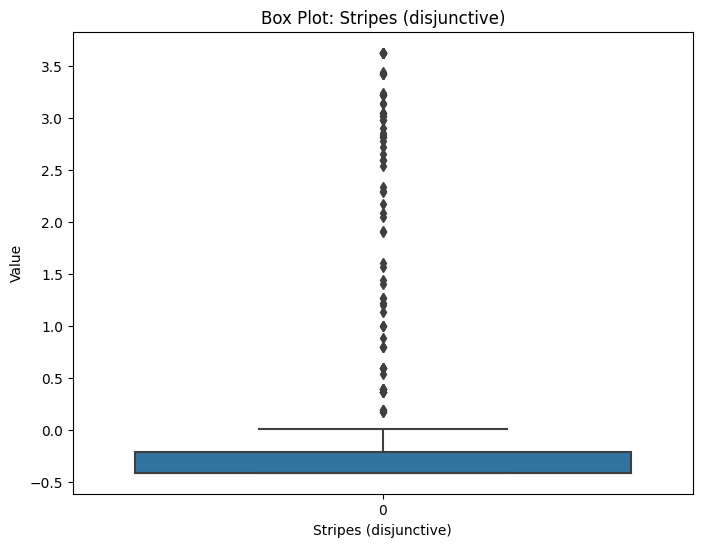

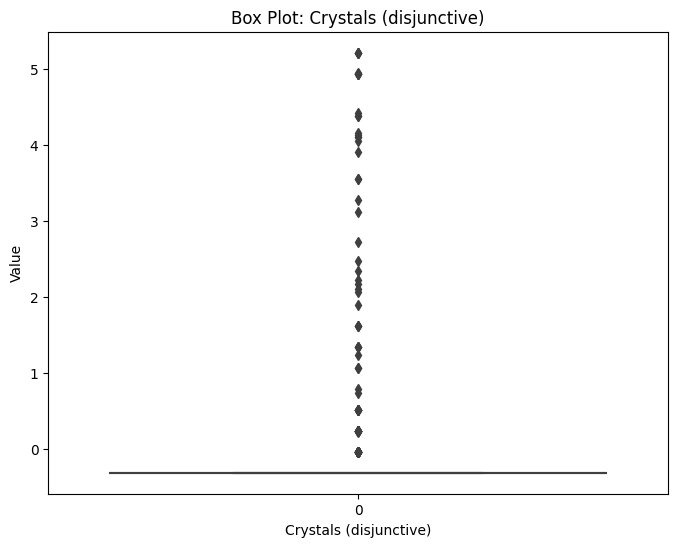

In [10]:
# boxplots

plt.figure(figsize=(20, 10))
for col in rock_df.columns[:-1]:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=rock_df[col], orient="vertical")
    plt.title(f'Box Plot: {col}')
    plt.xlabel(col)
    plt.ylabel('Value')
    plt.show()

# 1: Solution

The rock dataset has 19 features/attributes which predicts the category of rock:Igneous, metamorphic or sedimentary. The data consists of 540 rows and 20 attributes including the target variable Category. All the attributes are continuous valued. The data has no missing values. This problem is a supervised classification problem. It is a multiclass classification  problem as we are trying to classify the category of rock based on its features.

From the histogram of data attributes, we can see how distributed these values are, across the dataset. The histogram of almost all the attributes are right skewed. The boxplot also shows the median of all the attributes and outliers if there are any. There are a few outliers in all the attributes except in Porphyritic texture and salient green hue features.

There are no categorical attributes that might require special treatment like encoding. All the attributes are continuous valued and we can scale them before applying various classification algorithms.

# 2:

In [11]:
mat_cor = rock_df.corr()

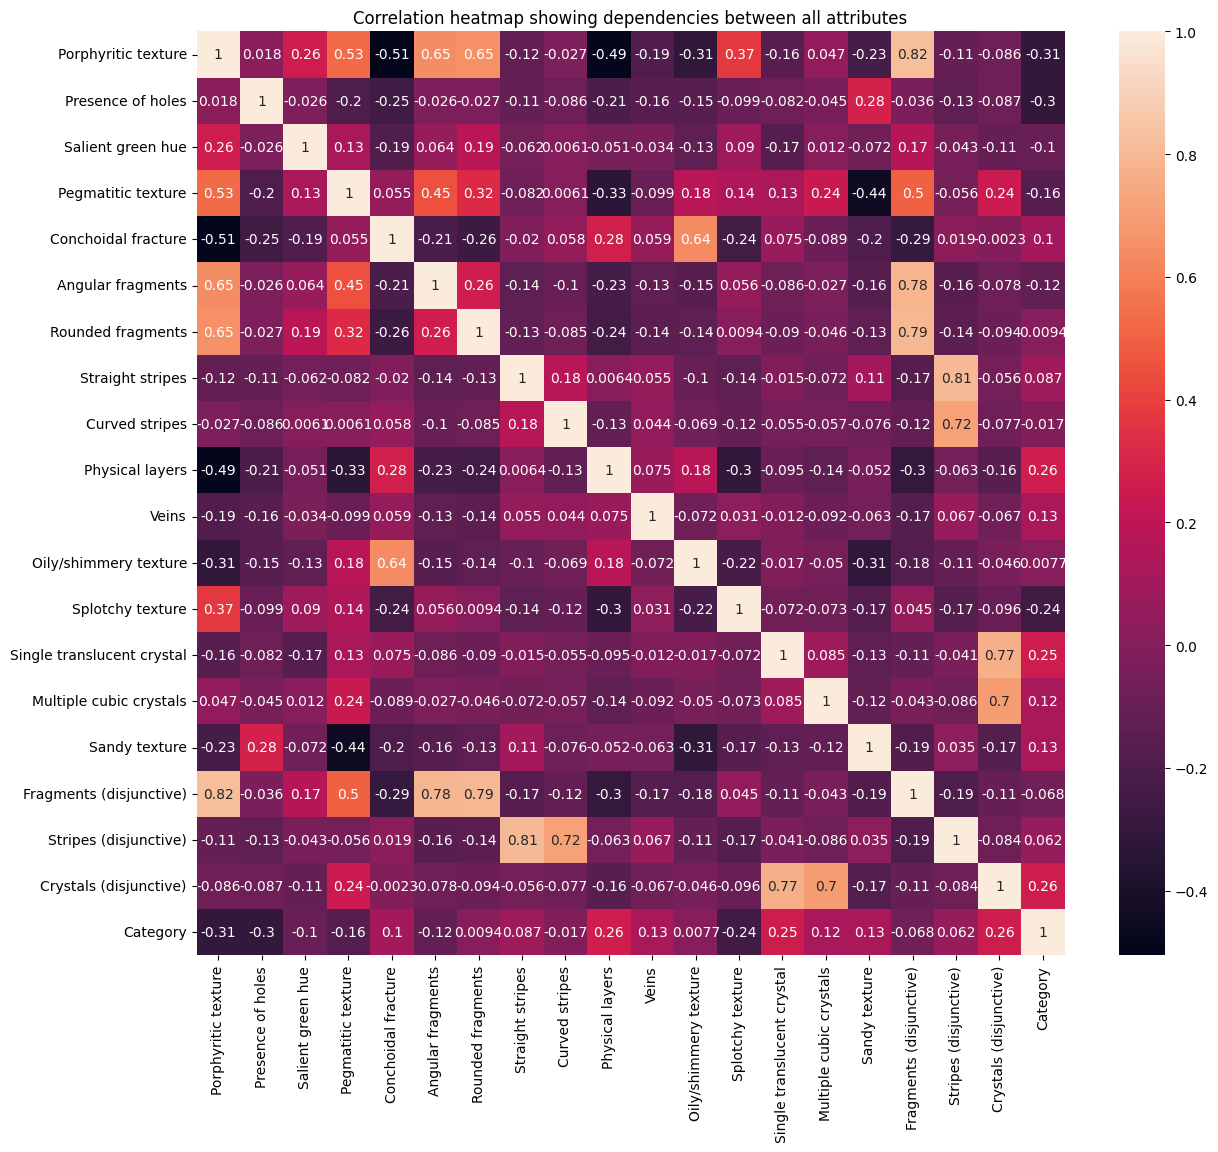

In [12]:
plt.figure(figsize=(14, 12))
sns.heatmap(mat_cor, annot=True)
plt.title('Correlation heatmap showing dependencies between all attributes')
plt.show()

In [13]:
# pearson correlation table
pearson_corr = abs(mat_cor['Category']).sort_values(ascending=False)
pearson_corr

Category                      1.000000
Porphyritic texture           0.305296
Presence of holes             0.301462
Physical layers               0.262855
Crystals (disjunctive)        0.258386
Single translucent crystal    0.253550
Splotchy texture              0.242921
Pegmatitic texture            0.164925
Sandy texture                 0.132240
Veins                         0.130094
Angular fragments             0.123388
Multiple cubic crystals       0.121163
Salient green hue             0.104748
Conchoidal fracture           0.103781
Straight stripes              0.086923
Fragments (disjunctive)       0.068022
Stripes (disjunctive)         0.061825
Curved stripes                0.016680
Rounded fragments             0.009450
Oily/shimmery texture         0.007679
Name: Category, dtype: float64

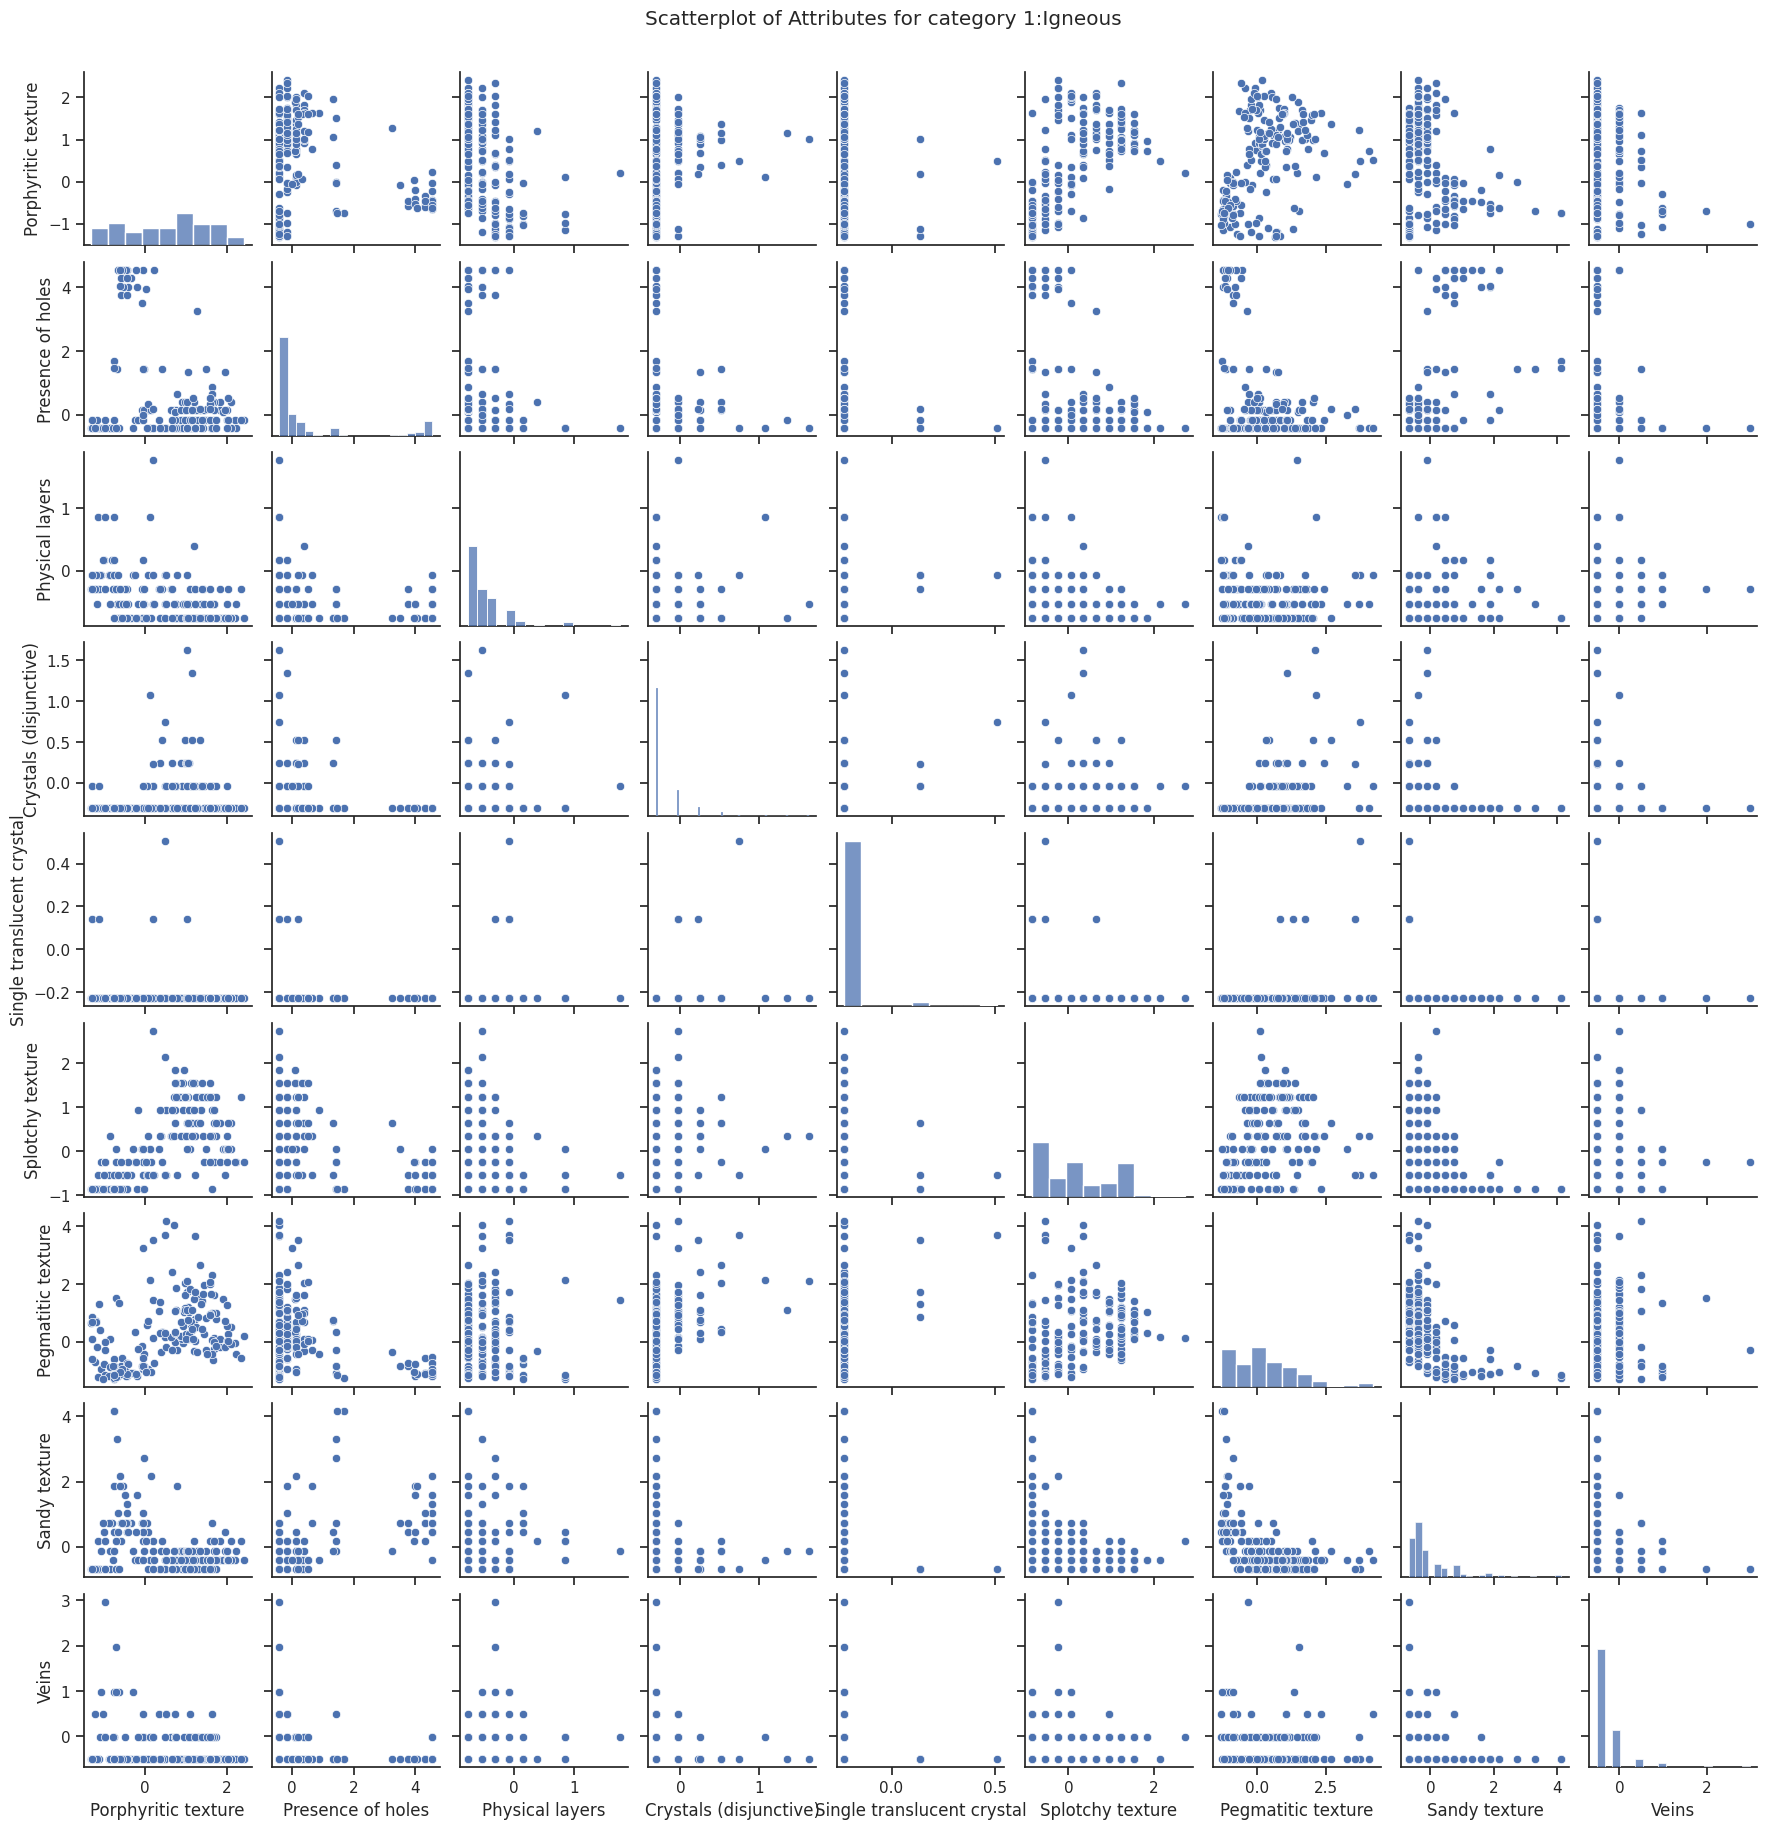

In [14]:
cat1 = rock_df[rock_df.Category == 1]
label = 'Category'
scat_vars = pearson_corr.index[pearson_corr>=0.13].tolist()
scat_vars.remove(label)
data_subset = cat1[scat_vars]
sns.set(style="ticks")
sns.pairplot(data_subset, height=2)
plt.suptitle("Scatterplot of Attributes for category 1:Igneous", y=1.02)
plt.show()

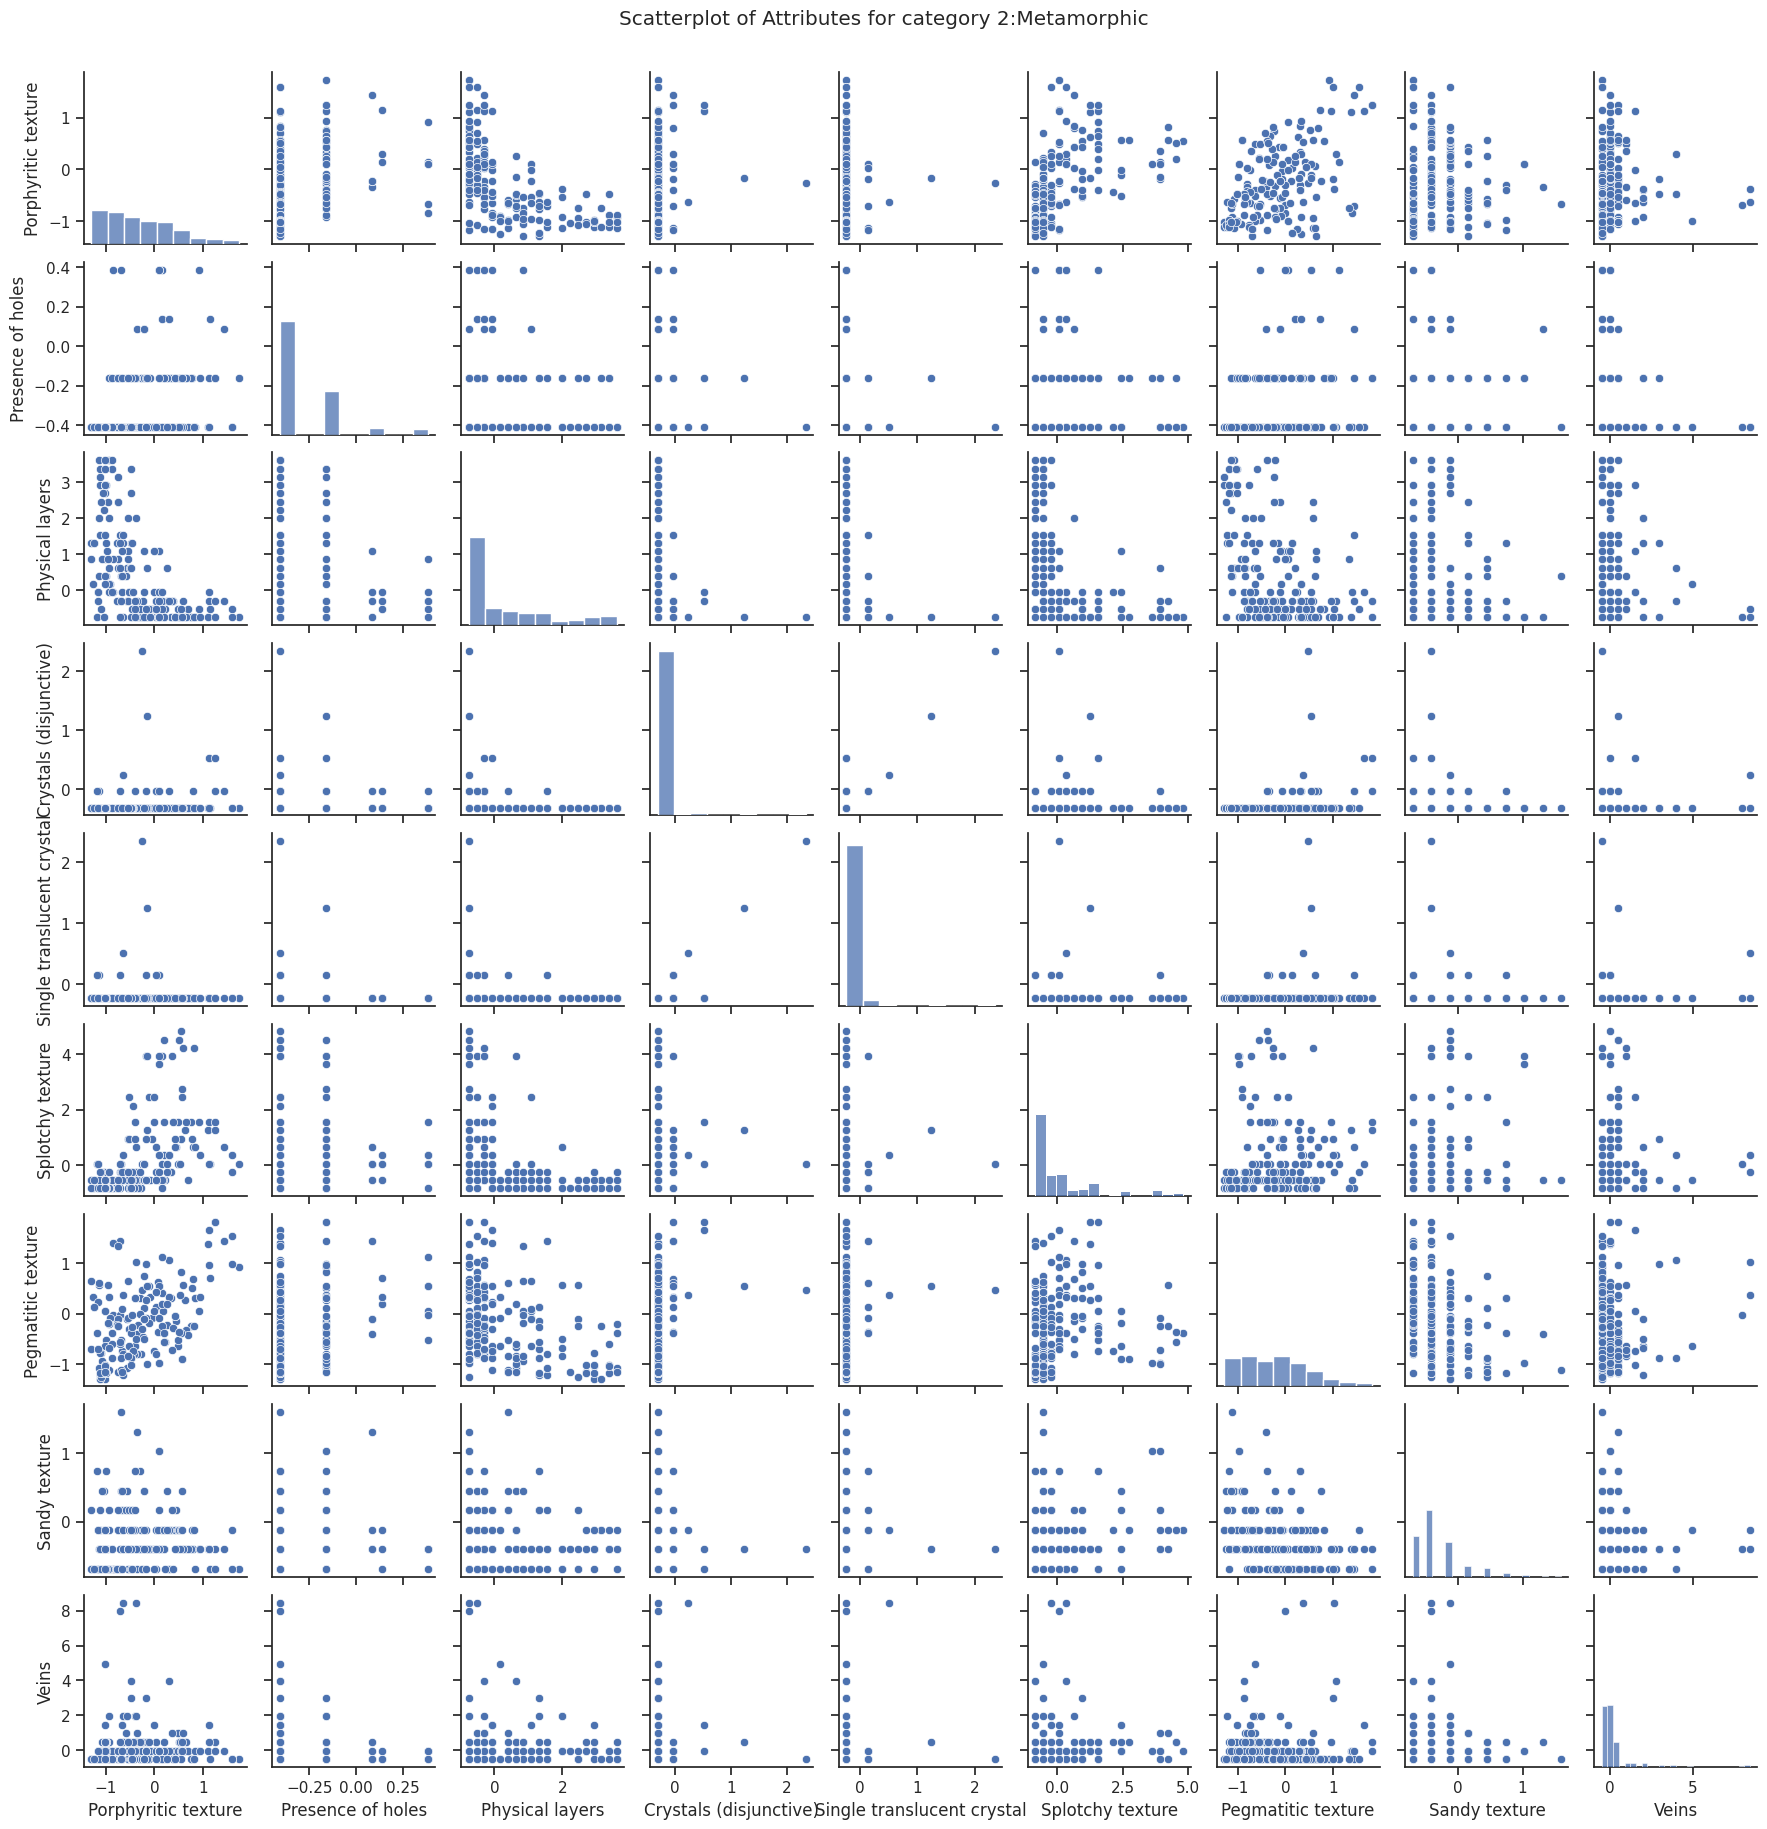

In [15]:
cat2 = rock_df[rock_df.Category == 2]
label = 'Category'
scat_vars = pearson_corr.index[pearson_corr>=0.13].tolist()
scat_vars.remove(label)
data_subset = cat2[scat_vars]
sns.set(style="ticks")
sns.pairplot(data_subset, height=2)
plt.suptitle("Scatterplot of Attributes for category 2:Metamorphic", y=1.02)
plt.show()

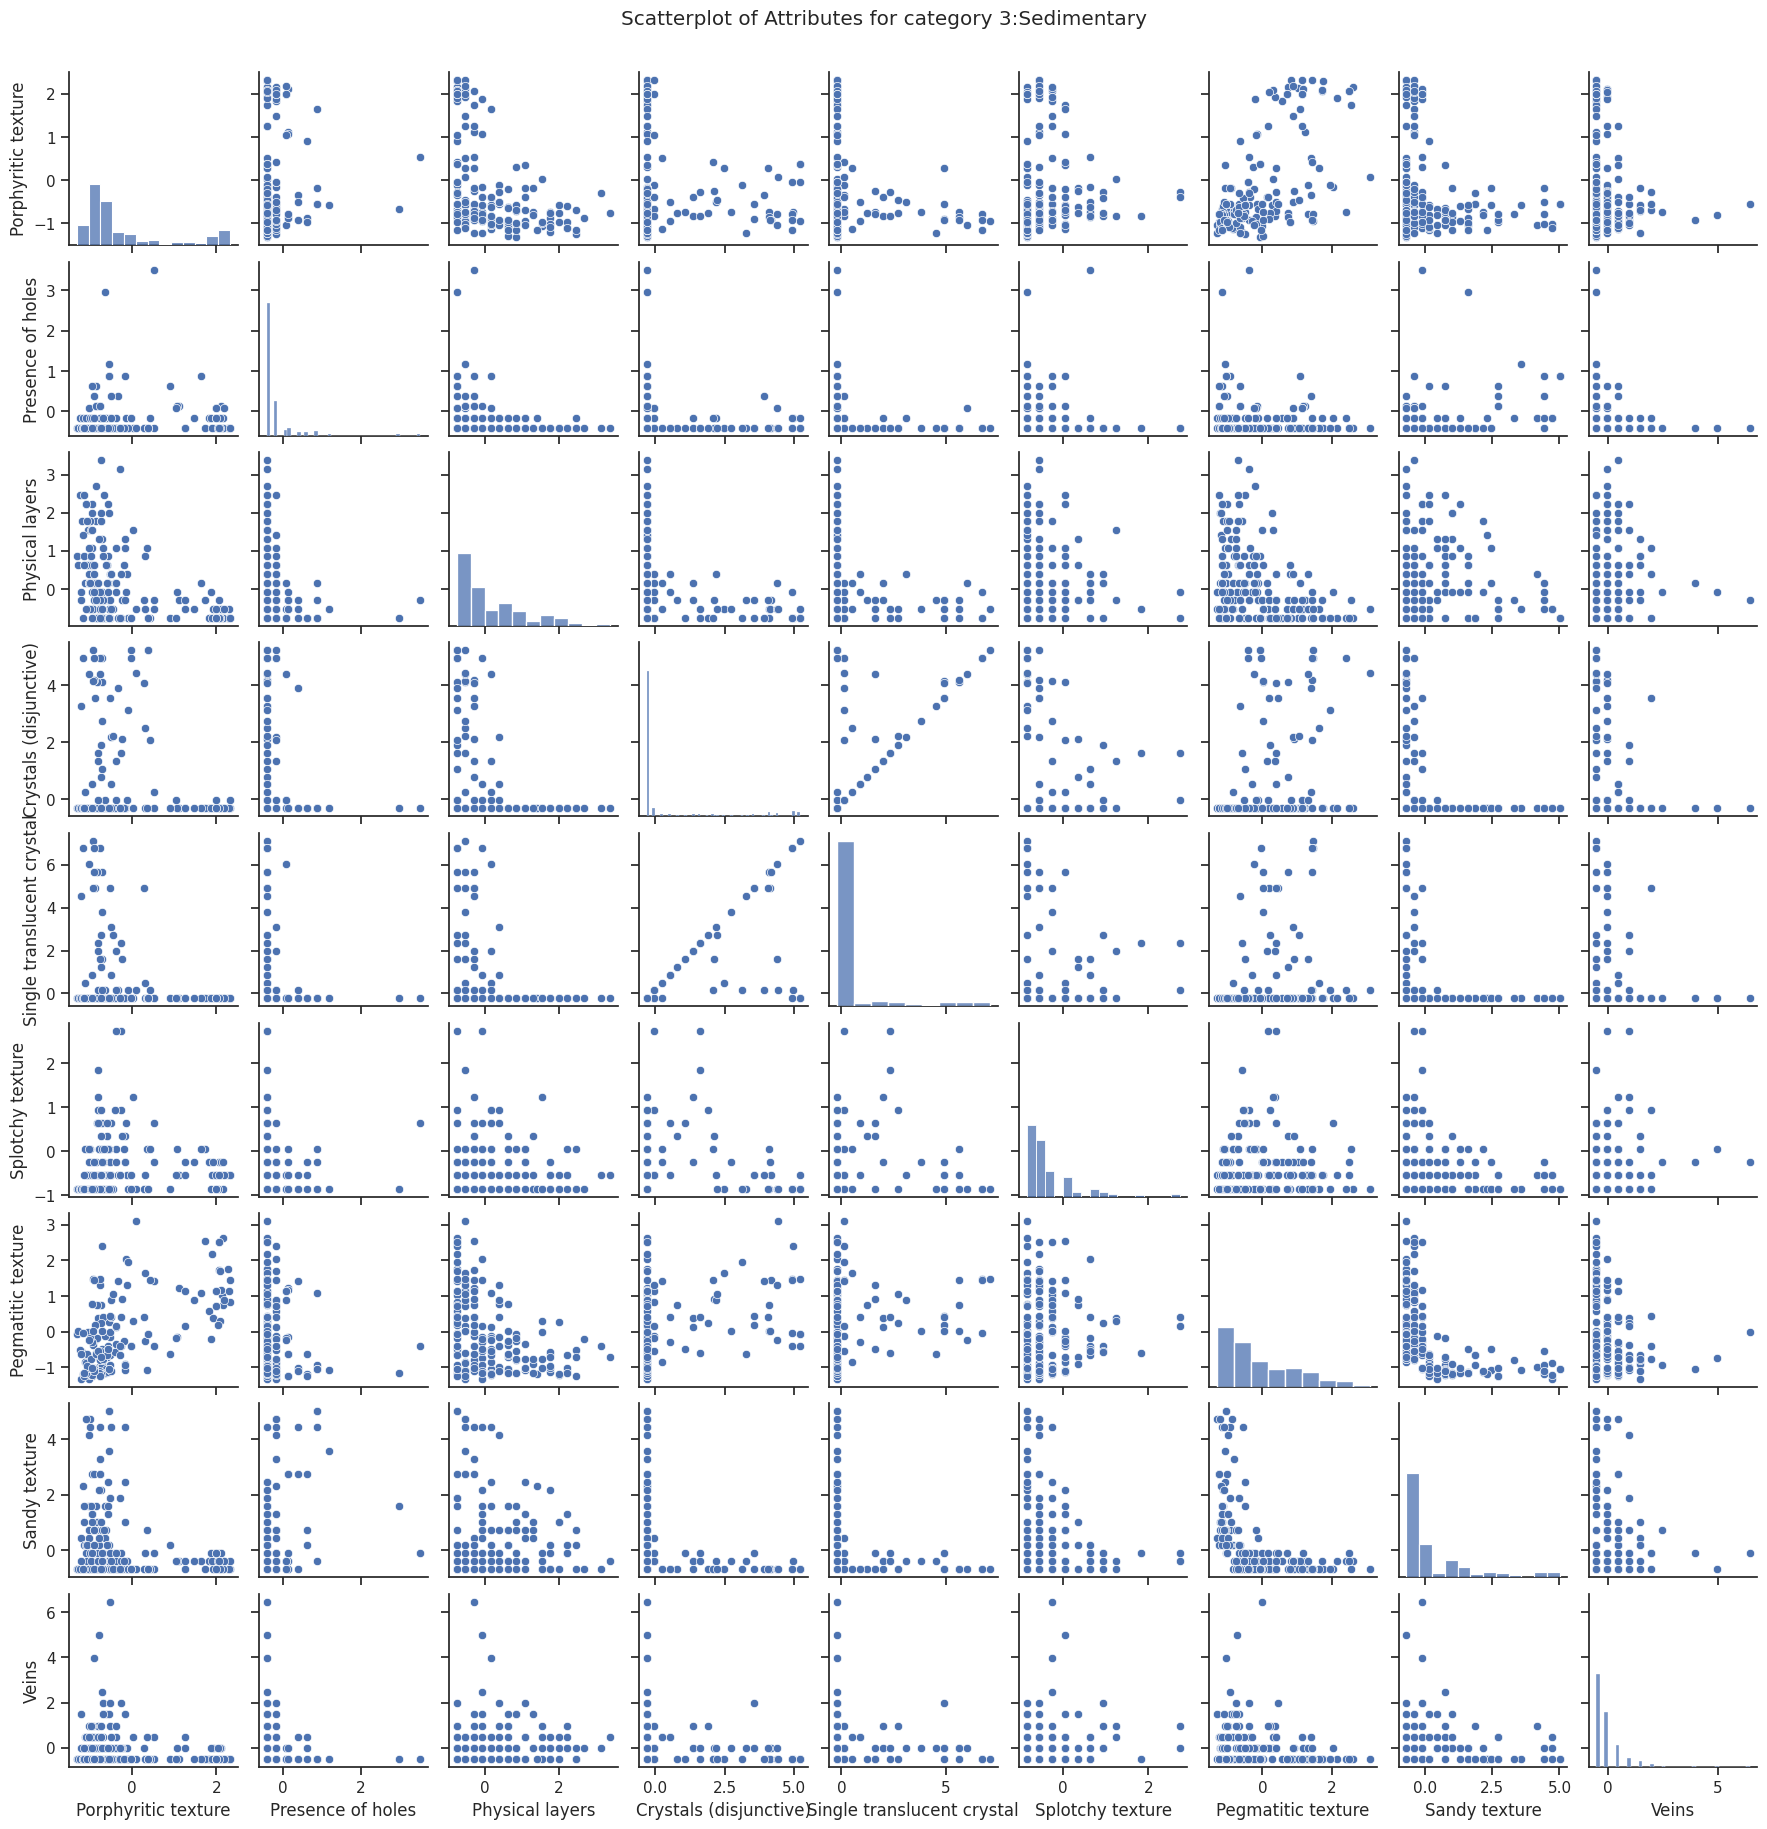

In [16]:
cat3 = rock_df[rock_df.Category == 3]
label = 'Category'
scat_vars = pearson_corr.index[pearson_corr>=0.13].tolist()
scat_vars.remove(label)
data_subset = cat3[scat_vars]
sns.set(style="ticks")
sns.pairplot(data_subset, height=2)
plt.suptitle("Scatterplot of Attributes for category 3:Sedimentary", y=1.02)
plt.show()

# 2: Solution

The correlation heatmap shows the correlation between every attributes. The darker the color goes, the more correlated it is with another feature. From this we can analyse a few things:



1.   'Porphyritic texture' and 'Presence of holes' are highly correlated to Category.
2.  'Porphyritic texture' is also highly correlated Fragments (disjunctive).
3. Stripes (disjunctive) is correlated straight stripes and curved stripes as well.
4. Fragments (disjunctive) is also correlated to angular fragments and rounded fragments
5. 'Porphyritic texture' is negatively correlated to Conchoidal fracture and category.


The scatterplots are a good way to show the relationships between two attributes visually: From scatter and PCC table,

1. From pairplot1, we see that 'Porphyritic texture' is slightly correlated to Pegmatitic texture.
2. From pairplot2, we again see that 'Porphyritic texture' is slightly correlated to Pegmatitic texture.
3. From pairplot3, we observe interesting aspects: apart from previous correlations, 'Single translucent crystal' and Crystals are nicely correlated.This means that for sedimentary rocks(category 3), these two features are quite correlated.
Since 'Porphyritic texture' is correlated with Conchoidal fracture and 'Presence of holes and fragments is correlated to angular fragments and rounded fragments, we drop angular fragments and rounded fragments. Similarly , since crystals and 'Single translucent crystal' are also correlated, we eliminate 'Single translucent crystal'.
This way the features with least correlation and importance are also eliminated during feature selection to get the best possible features to be passed to the model for classifications.


# 3:

# Feature Engineering

In [17]:
ranf_test = RandomForestClassifier(max_features = None,n_estimators=100,  max_depth=None, min_samples_split=5, min_samples_leaf=1, n_jobs=-1, random_state=1)

In [29]:
# recursive feature elimination
def recursivefeat_eli(model,n_feat):
  rfe = RFE(model,n_features_to_select=n_feat)
  rfe.fit(X_train,y_train) # call it after scaling X_train,y_train
  col_to_drop = []
  for i, j in zip(rock_df.iloc[:,:-1].columns,rfe.support_):
      if j==False:
          col_to_drop.append(i)
  return col_to_drop

In [30]:
# recursivefeat_eli(ranf_test, 8)

['Angular fragments',
 'Rounded fragments',
 'Straight stripes',
 'Curved stripes',
 'Physical layers',
 'Veins',
 'Oily/shimmery texture',
 'Splotchy texture',
 'Single translucent crystal',
 'Multiple cubic crystals',
 'Stripes (disjunctive)']

The above function recursivefeat_eli is used to determine the features to eliminate based on a model. To use this function, we first consider all the features and it provides us with a list of features that are least important. We pass the number of features to select and retain. I used ranf_test random forest function with a few robust hyperparamters which gives optimal feature selection. These results matched with my correlation elimination and scatterplots. So I decided to drop a few features suggested by RFE and manual selection to achieve best performance.

In [31]:
rock_df.drop(columns=['Angular fragments',
 'Rounded fragments',
 'Straight stripes',
 'Curved stripes',
 'Physical layers',
 'Veins',
 'Oily/shimmery texture',
 'Splotchy texture',
 'Single translucent crystal',
 'Multiple cubic crystals',
 'Stripes (disjunctive)'], inplace=True)

In [32]:
rock_df.describe()

,Porphyritic texture,Presence of holes,Salient green hue,Pegmatitic texture,Conchoidal fracture,Sandy texture,Fragments (disjunctive),Crystals (disjunctive),Category
count,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,540.000000
mean,-1.851852e-09,9.629630e-08,5.370370e-08,-6.296296e-08,-4.074074e-08,1.203704e-07,-1.148148e-07,3.018519e-07,2.000000
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.999999e-01,0.817254
min,-1.321491e+00,-4.076230e-01,-1.187950e+00,-1.322715e+00,-1.248012e+00,-6.859370e-01,-5.413910e-01,-3.104190e-01,1.000000
25%,-8.236470e-01,-4.076230e-01,-7.615050e-01,-8.046310e-01,-6.991450e-01,-6.859370e-01,-5.413910e-01,-3.104190e-01,1.000000
50%,-3.009100e-01,-4.076230e-01,-3.751970e-01,-1.829290e-01,-2.715380e-01,-4.011240e-01,-5.413910e-01,-3.104190e-01,2.000000
75%,7.644770e-01,-1.596880e-01,5.843033e-01,5.769290e-01,3.571070e-01,1.685000e-01,1.042300e-02,-3.104190e-01,3.000000
max,2.422299e+00,4.551072e+00,2.750390e+00,4.175892e+00,3.813059e+00,5.010309e+00,3.137369e+00,5.216791e+00,3.000000


In [33]:
sss = StratifiedShuffleSplit(n_splits=42, test_size=0.4, random_state=1)
for train_index, test_valid_index in sss.split(rock_df.drop(columns=['Category']), rock_df['Category']):
    s_train_set = rock_df.iloc[train_index]
    s_test_valid_set = rock_df.iloc[test_valid_index]

In [34]:
sss2 = StratifiedShuffleSplit(n_splits=42, test_size=0.5, random_state=1)
for test_index, valid_index in sss2.split(s_test_valid_set.drop(columns=['Category']), s_test_valid_set['Category']):
    s_test_set = s_test_valid_set.iloc[test_index]
    s_valid_set = s_test_valid_set.iloc[valid_index]

In [35]:
print(s_train_set.shape)
print(s_test_set.shape)
print(s_valid_set.shape)

(324, 9)
(108, 9)
(108, 9)


In [36]:
def proportions(data):
    return data['Category'].value_counts() / len(data)

train_set, test_valid_set = train_test_split(rock_df, test_size=0.4, random_state=1)
test_set, valid_set = train_test_split(test_valid_set, test_size=0.5, random_state=1)

compare_props = pd.DataFrame({
    "Overall %": proportions(rock_df),
    "Stratified test%": proportions(s_test_set),
    "Random test%": proportions(test_set),
      "Stratified validation%": proportions(s_valid_set),
    "Random validation%": proportions(valid_set),
}).sort_index()
compare_props.index.name = 'Category'
compare_props["Strat. Error test%"] = (compare_props["Stratified test%"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error test%"] = (compare_props["Random test%"] /
                                  compare_props["Overall %"] - 1)
compare_props["Strat. Error validation%"] = (compare_props["Stratified validation%"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error validation%"] = (compare_props[ "Random validation%"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified test%,Random test%,Stratified validation%,Random validation%,Strat. Error test%,Rand. Error test%,Strat. Error validation%,Rand. Error validation%
Category,,,,,,,,,
1,33.33,33.33,36.11,33.33,31.48,0.0,8.33,0.0,-5.56
2,33.33,33.33,29.63,33.33,31.48,0.0,-11.11,0.0,-5.56
3,33.33,33.33,34.26,33.33,37.04,0.0,2.78,0.0,11.11


In [37]:
y_train = np.array(s_train_set['Category'])
X_train = np.array(s_train_set.drop(columns=['Category']))

In [38]:
y_test = np.array(s_test_set['Category'])
X_test = np.array(s_test_set.drop(columns=['Category']))

In [39]:
X_valid = np.array(s_valid_set.drop(columns=['Category']))
y_valid = np.array(s_valid_set['Category'])

In [40]:
X_train.shape

(324, 8)

# 3: Solution
The category attribute is  used  as a variable to perform stratified splitting method as it has 3 categories. This sampling method takes the stratified samples of the data and spilts it as number of times as mentioned in the test size. Here I have mentioned 0.4, which means 40 percent of the data is being stratified shuffled and split from the whole population and 60 percent is used for training. In sss2, I have used test size 0.5 on the test_valid set(0.4 of sss), to split into 0.2 test and 0.2 validation data. To perform this, we should have categories of the splitting variable to handle the Stratifed shuffle split. Now we have 60 percent data for training, 20 percent for testing and 20 percent for validation.

In a stratified sample, we divide a population into homogeneous subpopulations called strata  based on specific attributes of the data. Once the strata test and strata train data are obtained, we find the proportions of 'Category' in the whole data and the samples obtained using various sampling methods. The table shows that in each label of Category, the overall population ratio,stratifed ratio, and error values are shown. The first row represents when the category is 1, we have the overall proportion of population as 33.33, the stratified proportion(sample test) is	33.33, by randomizing we get	36.11 and the stratied error is	0. Similarly, validation scores can also been seen from the table. From these values we say that, sample test set and sample validation is representative of the population data. This can be verified using .describe tables too. We then create a training, validation and  testing sets, from stratas.

# 4:

In [41]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid =scaler.transform(X_valid)

In [42]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7
count,3.240000e+02,3.240000e+02,3.240000e+02,3.240000e+02,3.240000e+02,3.240000e+02,3.240000e+02,3.240000e+02
mean,1.918904e-17,1.644775e-17,1.096517e-17,-1.918904e-17,3.289550e-17,-4.111937e-18,-5.756712e-17,-3.837808e-17
std,1.001547e+00,1.001547e+00,1.001547e+00,1.001547e+00,1.001547e+00,1.001547e+00,1.001547e+00,1.001547e+00
min,-1.312608e+00,-3.971274e-01,-1.187106e+00,-1.387749e+00,-1.242761e+00,-6.266142e-01,-5.795300e-01,-3.044928e-01
25%,-8.833983e-01,-3.971274e-01,-7.927315e-01,-8.211424e-01,-6.972454e-01,-6.266142e-01,-5.795300e-01,-3.044928e-01
50%,-2.753510e-01,-3.971274e-01,-3.983579e-01,-1.286222e-01,-2.785926e-01,-3.607119e-01,-5.795300e-01,-3.044928e-01
75%,8.262881e-01,-1.168019e-01,6.259906e-01,5.998732e-01,3.620724e-01,-2.833517e-02,9.304599e-02,-3.044928e-01
max,2.249834e+00,5.209377e+00,2.833461e+00,4.339482e+00,3.787410e+00,4.691419e+00,2.880669e+00,5.662269e+00


In [43]:
pd.DataFrame(X_test).describe()

,0,1,2,3,4,5,6,7
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,-0.168269,0.072158,0.167073,0.005752,0.051783,0.055375,-0.167109,0.043859
std,0.909666,1.129227,1.118846,1.181704,1.066225,0.898797,0.853999,1.188551
min,-1.336453,-0.397127,-1.110280,-1.351774,-1.122241,-0.626614,-0.579530,-0.304493
25%,-0.871476,-0.397127,-0.715905,-0.884099,-0.590996,-0.360712,-0.579530,-0.304493
50%,-0.530492,-0.397127,-0.203732,-0.222157,-0.272249,-0.360712,-0.579530,-0.304493
75%,0.357734,-0.116802,0.773241,0.608867,0.279611,0.171091,-0.233510,-0.304493
max,2.178299,5.209377,2.751514,3.828635,3.704949,3.893714,2.880669,5.976310


# Multinomial Logistic regression

In [44]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': [ 'lbfgs',  'newton-cg','sag', 'saga'],
    'max_iter': [ 100, 200, 300]
}

In [45]:
train_lg=[]
val_lg=[]
for miter in param_grid['max_iter']:
  for sol in param_grid['solver']:
    for c in param_grid['C']:
      softmax_reg = LogisticRegression(multi_class='multinomial', C = c, solver = sol,max_iter = miter)
      softmax_reg.fit(X_train, y_train)
      train_lg.append((softmax_reg.score(X_train, y_train),(c,sol,miter)))
      val_lg.append((softmax_reg.score(X_valid, y_valid),(c,sol,miter)))

In [46]:
val_lg

[(0.6944444444444444, (0.001, 'lbfgs', 100)),
 (0.7222222222222222, (0.01, 'lbfgs', 100)),
 (0.7962962962962963, (0.1, 'lbfgs', 100)),
 (0.7962962962962963, (1, 'lbfgs', 100)),
 (0.7962962962962963, (10, 'lbfgs', 100)),
 (0.6944444444444444, (0.001, 'newton-cg', 100)),
 (0.7222222222222222, (0.01, 'newton-cg', 100)),
 (0.7962962962962963, (0.1, 'newton-cg', 100)),
 (0.7962962962962963, (1, 'newton-cg', 100)),
 (0.7962962962962963, (10, 'newton-cg', 100)),
 (0.6944444444444444, (0.001, 'sag', 100)),
 (0.7222222222222222, (0.01, 'sag', 100)),
 (0.7962962962962963, (0.1, 'sag', 100)),
 (0.7962962962962963, (1, 'sag', 100)),
 (0.7962962962962963, (10, 'sag', 100)),
 (0.6944444444444444, (0.001, 'saga', 100)),
 (0.7222222222222222, (0.01, 'saga', 100)),
 (0.7962962962962963, (0.1, 'saga', 100)),
 (0.7962962962962963, (1, 'saga', 100)),
 (0.7962962962962963, (10, 'saga', 100)),
 (0.6944444444444444, (0.001, 'lbfgs', 200)),
 (0.7222222222222222, (0.01, 'lbfgs', 200)),
 (0.7962962962962963, (0

In [47]:
idx=[]
for i in range(len(val_lg)):
  idx.append(val_lg[i][0])
print(f'Best model hyperparameters: {val_lg[np.argmax(idx)]}')

Best model hyperparameters: (0.7962962962962963, (0.1, 'lbfgs', 100))


From the val_lg, we see that, when there is less value of C, more regularisation, then the accuracy is low. But when C is optimal, say 0.1, 1, or 10, there is optimal regularisation applied. The solver chosen is default as it does not affect the accuracy. The max_iter does not affect the accuracy as well.

Based on this and since the best model hyperparamters is based on the highest validation accuracy and the lowest difference between validation and training accuracy, I have chosen the best model parameters as:  multi_class='multinomial', C = 0.1, solver='lbfgs', max_iter = 100, random_state=1

In [48]:
# using the best model hyperparameters(C= 0.1, solver='lbfgs', max_iter = 100, random_state=1)
softmax_reg = LogisticRegression(multi_class='multinomial', C = 0.1, solver='lbfgs', max_iter = 100, random_state=1)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=0.1, multi_class='multinomial', random_state=1)

In [49]:
y_pred_train = softmax_reg.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train, average='weighted')
recall = recall_score(y_train, y_pred_train, average='weighted')
f1 = f1_score(y_train, y_pred_train, average='weighted')

print('Model performance on Training set')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Model performance on Training set
Accuracy: 0.6883
Precision: 0.7037
Recall: 0.6883
F1 Score: 0.6878


In [50]:
y_pred_valid = softmax_reg.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred_valid)
precision = precision_score(y_valid, y_pred_valid, average='weighted')
recall = recall_score(y_valid, y_pred_valid, average='weighted')
f1 = f1_score(y_valid, y_pred_valid, average='weighted')

print('Model performance on Validation set')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Model performance on Validation set
Accuracy: 0.7963
Precision: 0.8086
Recall: 0.7963
F1 Score: 0.7967


In [51]:
y_pred = softmax_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Model performance on Test set')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Model performance on Test set
Accuracy: 0.6667
Precision: 0.6753
Recall: 0.6667
F1 Score: 0.6640


We can observe that the training accuracy is 68.83 percent, and validation accuracy is 79.63 percent. There is no overfitting observed. The test also gives accuracy of 66.67 percent which is quite good for softmax regression on this dataset.

# Support Vector Machine

In [52]:
param_grid = {
    'C': [0.001, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf','sigmoid'],
    'degree': [2, 3, 4, 10],
    'gamma': ['scale', 'auto', 0.1, 1]
}

In [53]:
train_svm=[]
val_svm=[]
for deg in param_grid['degree']:
  for gam in param_grid['gamma']:
    for ker in param_grid['kernel']:
      for c in param_grid['C']:
        support_vec= SVC(C = c, kernel = ker ,degree = deg, gamma = gam)
        support_vec.fit(X_train, y_train)
        train_svm.append((support_vec.score(X_train, y_train),(deg, gam, ker, c)))
        val_svm.append((support_vec.score(X_valid, y_valid),(deg, gam, ker, c)))

In [54]:
val_svm

[(0.6111111111111112, (2, 'scale', 'linear', 0.001)),
 (0.7592592592592593, (2, 'scale', 'linear', 0.1)),
 (0.7777777777777778, (2, 'scale', 'linear', 1)),
 (0.7685185185185185, (2, 'scale', 'linear', 10)),
 (0.7685185185185185, (2, 'scale', 'linear', 100)),
 (0.48148148148148145, (2, 'scale', 'poly', 0.001)),
 (0.5740740740740741, (2, 'scale', 'poly', 0.1)),
 (0.7129629629629629, (2, 'scale', 'poly', 1)),
 (0.7037037037037037, (2, 'scale', 'poly', 10)),
 (0.7592592592592593, (2, 'scale', 'poly', 100)),
 (0.7037037037037037, (2, 'scale', 'rbf', 0.001)),
 (0.7037037037037037, (2, 'scale', 'rbf', 0.1)),
 (0.7685185185185185, (2, 'scale', 'rbf', 1)),
 (0.7592592592592593, (2, 'scale', 'rbf', 10)),
 (0.7777777777777778, (2, 'scale', 'rbf', 100)),
 (0.6759259259259259, (2, 'scale', 'sigmoid', 0.001)),
 (0.7129629629629629, (2, 'scale', 'sigmoid', 0.1)),
 (0.6296296296296297, (2, 'scale', 'sigmoid', 1)),
 (0.5370370370370371, (2, 'scale', 'sigmoid', 10)),
 (0.4351851851851852, (2, 'scale', '

In [55]:
idx=[]
for i in range(len(val_svm)):
  idx.append(val_svm[i][0])
for i in val_svm:
  if i[0]==max(idx):
    print(i)
print(f'Best model hyperparameters: {val_svm[np.argmax(idx)]}')

(0.7962962962962963, (2, 1, 'rbf', 1))
(0.7962962962962963, (3, 1, 'rbf', 1))
(0.7962962962962963, (4, 1, 'rbf', 1))
(0.7962962962962963, (10, 1, 'rbf', 1))
Best model hyperparameters: (0.7962962962962963, (2, 1, 'rbf', 1))


From the val_svm, we see that, when there is less value of C, more regularisation, then the accuracy is low. But when C is 1,  there is optimal regularisation applied in this case. The kernel chosen is rbf, since linear, poly does not work well with this dataset. Since the kernel is not poly, the  degree chosen is default as it does not affect the accuracy. The gamma does not affect the accuracy as well.

Based on this and since the best model hyperparamters is based on the highest validation accuracy and the lowest difference between validation and training accuracy, I have chosen the best model parameters as:  C = 1, kernel = 'rbf' ,degree = 2, gamma = 1,probability=True, random_state =1

In [56]:
# using the best hyperparameters C = 1, kernel = 'rbf' ,degree = 2, gamma = 1,probability=True, random_state =1
support_vec = SVC(C = 1, kernel = 'rbf' ,degree = 2, gamma = 1,probability=True, random_state =1)
support_vec.fit(X_train, y_train)

SVC(C=1, degree=2, gamma=1, probability=True, random_state=1)

In [57]:
y_pred_train = support_vec.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train, average='weighted')
recall = recall_score(y_train, y_pred_train, average='weighted')
f1 = f1_score(y_train, y_pred_train, average='weighted')

print('Model performance on Training set')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Model performance on Training set
Accuracy: 0.8796
Precision: 0.8828
Recall: 0.8796
F1 Score: 0.8804


In [58]:
y_pred_valid = support_vec.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred_valid)
precision = precision_score(y_valid, y_pred_valid, average='weighted')
recall = recall_score(y_valid, y_pred_valid, average='weighted')
f1 = f1_score(y_valid, y_pred_valid, average='weighted')

print('Model performance on Validation set')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Model performance on Validation set
Accuracy: 0.7963
Precision: 0.8029
Recall: 0.7963
F1 Score: 0.7974


In [59]:
y_pred = support_vec.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Model performance on Test set')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Model performance on Test set
Accuracy: 0.6944
Precision: 0.6967
Recall: 0.6944
F1 Score: 0.6922


We can observe that the training accuracy is 87.96 percent, and validation accuracy is 79.63 percent. There is slight overfitting observed. The test also gives accuracy of 69.44 percent which is quite good for SVM on this dataset.

# Random Forest

In [60]:
param_grid = {
    'max_features' : ['sqrt', 'log2', None, 5],
    'n_estimators': [50, 100, 500],
    'max_depth': [None, 2, 10, 100, 300],
    'min_samples_split': [2, 5, 10, 100],
    'min_samples_leaf': [1, 2, 10, 100],
}

In [61]:
train_rf=[]
val_rf=[]
for feat in param_grid['max_features']:
  for est in param_grid['n_estimators']:
    for dep in param_grid['max_depth']:
      for sp in param_grid['min_samples_split']:
        for leaf in param_grid['min_samples_leaf']:
          rf= RandomForestClassifier(n_estimators = est,max_depth=dep, min_samples_split =sp, min_samples_leaf=leaf, max_features=feat, random_state =1)
          rf.fit(X_train, y_train)
          train_rf.append((rf.score(X_train, y_train),(feat,est, dep, sp, leaf)))
          val_rf.append((rf.score(X_valid, y_valid),(feat, est, dep, sp, leaf)))

In [62]:
val_rf

[(0.8240740740740741, ('sqrt', 50, None, 2, 1)),
 (0.8425925925925926, ('sqrt', 50, None, 2, 2)),
 (0.8148148148148148, ('sqrt', 50, None, 2, 10)),
 (0.4444444444444444, ('sqrt', 50, None, 2, 100)),
 (0.8611111111111112, ('sqrt', 50, None, 5, 1)),
 (0.8333333333333334, ('sqrt', 50, None, 5, 2)),
 (0.8148148148148148, ('sqrt', 50, None, 5, 10)),
 (0.4444444444444444, ('sqrt', 50, None, 5, 100)),
 (0.8148148148148148, ('sqrt', 50, None, 10, 1)),
 (0.8055555555555556, ('sqrt', 50, None, 10, 2)),
 (0.8148148148148148, ('sqrt', 50, None, 10, 10)),
 (0.4444444444444444, ('sqrt', 50, None, 10, 100)),
 (0.7685185185185185, ('sqrt', 50, None, 100, 1)),
 (0.7685185185185185, ('sqrt', 50, None, 100, 2)),
 (0.7685185185185185, ('sqrt', 50, None, 100, 10)),
 (0.4444444444444444, ('sqrt', 50, None, 100, 100)),
 (0.75, ('sqrt', 50, 2, 2, 1)),
 (0.75, ('sqrt', 50, 2, 2, 2)),
 (0.7407407407407407, ('sqrt', 50, 2, 2, 10)),
 (0.4444444444444444, ('sqrt', 50, 2, 2, 100)),
 (0.75, ('sqrt', 50, 2, 5, 1)),
 

In [63]:
idx=[]
for i in range(len(val_rf)):
  idx.append(val_rf[i][0])
for i in val_rf:
  if i[0]==max(idx):
    print(i)
print(f'Best model hyperparameters: {val_rf[np.argmax(idx)]}')

(0.8703703703703703, (5, 100, 10, 2, 1))
Best model hyperparameters: (0.8703703703703703, (5, 100, 10, 2, 1))


From the val_rf, we see that, when there is max_features=5, then the valdation accuracy is highest, for all other max_features like sqrt and log2, the accuracy is high but not the highest values. The number of trees is 100 since the algorithm gives good values within 100 trees so there is no need to use 300 or even 500 trees that might produce similar results. The max_depth used is 10, instead of defining None for this data, if the max_depth is say 10, then the min_leaf_samples must be less, if number of samples on the leaf node is more say 100, then we get less acccuracy as we have many samples left at the leaf node and it has impurity because the depth of tree is small as well. Even if the deoth of tree is say 300, then the leaf samples must be still low as possible to acheive good performance. The  minimum number of samples required to split an internal node is 10 samples as it does not affect accuracy as other hyperparameters does. The minimum samples on the leaf node must be low, 1 for achieving good performance.

Based on this and since the best model hyperparamters is based on the highest validation accuracy and the lowest difference between validation and training accuracy, I have chosen the best model parameters as:  max_features = 5,n_estimators=100,  max_depth=10, min_samples_split=2, min_samples_leaf=1, n_jobs=-1, random_state=1.

In [64]:
# using the best hyperparamaters max_features = 5,n_estimators=100,  max_depth=10, min_samples_split=2, min_samples_leaf=1, n_jobs=-1, random_state=1
randomf = RandomForestClassifier(max_features = 5,n_estimators=100,  max_depth=10, min_samples_split=2, min_samples_leaf=1, n_jobs=-1, random_state=1)
randomf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=5, n_jobs=-1, random_state=1)

In [65]:
feature_importance = randomf.feature_importances_
feat= rock_df.columns
feature_importance_list = list(zip(feat,feature_importance))
sorted(feature_importance_list, key=lambda x: x[1], reverse=True)

[('Porphyritic texture', 0.19543969943290648),
 ('Fragments (disjunctive)', 0.16990601963849897),
 ('Conchoidal fracture', 0.16401233927932946),
 ('Pegmatitic texture', 0.10689355636523158),
 ('Sandy texture', 0.10477455754042954),
 ('Salient green hue', 0.0987479655270045),
 ('Crystals (disjunctive)', 0.08015169524789334),
 ('Presence of holes', 0.08007416696870617)]

In [66]:
feat_names, feat_importance = zip(*(sorted(feature_importance_list, key=lambda x: x[1], reverse=True)))

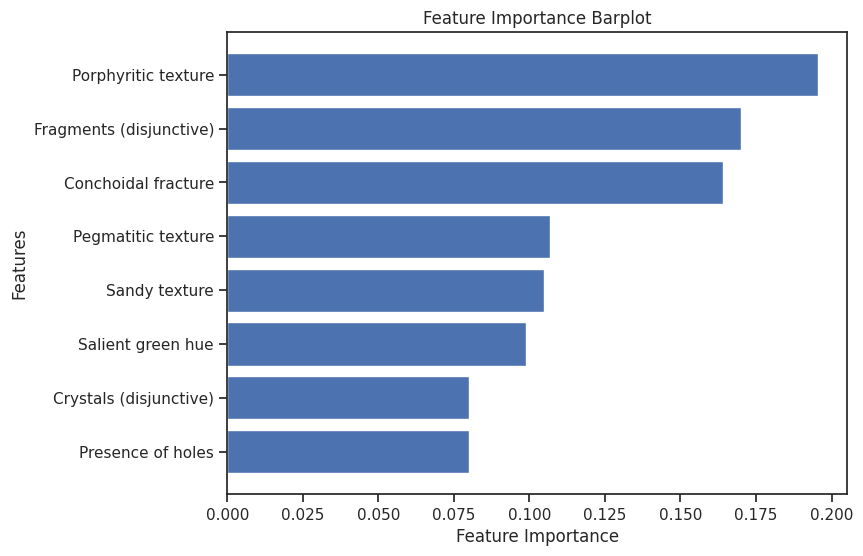

In [67]:
plt.figure(figsize=(8, 6))
plt.barh(feat_names, feat_importance)
plt.title('Feature Importance Barplot')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()

From the feature importances, we can eliminate the features that are less importance when compared to other features. This will aid in improvement of accuracy. Here we observe, after dropping the features using RFE function defined earlier(which basically does feature importance done in Random forest) we get the importance of these features, and Porphyritic texture has more importance compared to Presence of holes and Crystals.

In [68]:
y_pred_train = randomf.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train, average='weighted')
recall = recall_score(y_train, y_pred_train, average='weighted')
f1 = f1_score(y_train, y_pred_train, average='weighted')

print('Model performance on Training set')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Model performance on Training set
Accuracy: 0.9815
Precision: 0.9821
Recall: 0.9815
F1 Score: 0.9815


In [69]:
y_pred_valid = randomf.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred_valid)
precision = precision_score(y_valid, y_pred_valid, average='weighted')
recall = recall_score(y_valid, y_pred_valid, average='weighted')
f1 = f1_score(y_valid, y_pred_valid, average='weighted')

print('Model performance on Validation set')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Model performance on Validation set
Accuracy: 0.8704
Precision: 0.8724
Recall: 0.8704
F1 Score: 0.8706


In [70]:
y_pred = randomf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Model performance on Test set')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Model performance on Test set
Accuracy: 0.7500
Precision: 0.7611
Recall: 0.7500
F1 Score: 0.7474


We can observe that the training accuracy is 98.15 percent, and validation accuracy is 87.04 percent.  The test set also gives accuracy of 75 percent which is quite good for Random Forest on this dataset.

Comparing all the classification models, Random forest gives the highest validation accuracy of 87.04 percent which will boost the ensemble model as well.

# 5:

In [71]:
ensemble = VotingClassifier(estimators=[
    ('lr', softmax_reg),
    ('svm', support_vec),
    ('rf', randomf)
], voting='hard')

In [72]:
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.1,
                                                 multi_class='multinomial',
                                                 random_state=1)),
                             ('svm',
                              SVC(C=1, degree=2, gamma=1, probability=True,
                                  random_state=1)),
                             ('rf',
                              RandomForestClassifier(max_depth=10,
                                                     max_features=5, n_jobs=-1,
                                                     random_state=1))])

In [73]:
for name, est in ensemble.named_estimators_.items():
    print(name, "=", ensemble.score(X_test, y_test))

lr = 0.7222222222222222
svm = 0.7222222222222222
rf = 0.7222222222222222


In [74]:
y_pred_valid = ensemble.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred_valid)
precision = precision_score(y_valid, y_pred_valid, average='weighted')
recall = recall_score(y_valid, y_pred_valid, average='weighted')
f1 = f1_score(y_valid, y_pred_valid, average='weighted')

print('Model performance on Validation set for hard voting')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Model performance on Validation set for hard voting
Accuracy: 0.8241
Precision: 0.8362
Recall: 0.8241
F1 Score: 0.8255


In [75]:
ensemble_soft = VotingClassifier(estimators=[
    ('lr', softmax_reg),
    ('svm', support_vec),
    ('rf', randomf)
], voting='soft')

In [76]:
ensemble_soft.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.1,
                                                 multi_class='multinomial',
                                                 random_state=1)),
                             ('svm',
                              SVC(C=1, degree=2, gamma=1, probability=True,
                                  random_state=1)),
                             ('rf',
                              RandomForestClassifier(max_depth=10,
                                                     max_features=5, n_jobs=-1,
                                                     random_state=1))],
                 voting='soft')

In [77]:
for name, est in ensemble_soft.named_estimators_.items():
    print(name, "=", ensemble_soft.score(X_test, y_test))

lr = 0.7222222222222222
svm = 0.7222222222222222
rf = 0.7222222222222222


In [78]:
y_pred_valid = ensemble_soft.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred_valid)
precision = precision_score(y_valid, y_pred_valid, average='weighted')
recall = recall_score(y_valid, y_pred_valid, average='weighted')
f1 = f1_score(y_valid, y_pred_valid, average='weighted')

print('Model performance on Validation set for soft voting')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Model performance on Validation set for soft voting
Accuracy: 0.8241
Precision: 0.8318
Recall: 0.8241
F1 Score: 0.8252


From the ensemble Voting classifier above, we observe that both soft and Hard Voting, gives an validation accuracy of 82.41 percent. So we will use this model with soft voting and hard voting on the test set.

In [79]:
y_pred = ensemble_soft.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Ensemble Model performance on Test set')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Ensemble Model performance on Test set
Accuracy: 0.7222
Precision: 0.7321
Recall: 0.7222
F1 Score: 0.7198


The soft voting classifier gives an accuracy of 72.22 percent on test data which is based on individual classifiers with their best paramters

In [80]:
y_pred = ensemble.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Ensemble Model performance on Test set')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Ensemble Model performance on Test set
Accuracy: 0.7222
Precision: 0.7297
Recall: 0.7222
F1 Score: 0.7208


Both the voting classifiers gives equal results and hence hard voting can be chosen for test as it has higher F1 score 72.08 percent. It is better because Random forest boosted the performance of ensemble model.

# References:



1.  https://osf.io/cvwu9/wiki/Data%20File%20Descriptions/
2.  https://github.com/ageron/handson-ml3/tree/main
3.
https://www.scribbr.com/methodology/stratified-sampling/#:~:text=What%20is%20stratified%20sampling%3F,using%20another%20probability%20sampling%20method.
4.  Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 3rd Edition by Aurélien Géron, October 2022, O'Reilly Media, Inc. ISBN: 9781098125974.
5. https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
